In [0]:
#Tensorflow Import and GPU recognition
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16446707470176930848, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15506061825563030248
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14839070345534532554
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4251270142784145730
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip '/content/drive/My Drive/Progetto Advanced Machine Learning/fruits.zip' -d '/content'

Streaming output truncated to the last 5000 lines.
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_16_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_17_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_181_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_182_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_183_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_184_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_185_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_186_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_187_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_188_100.jpg  
  inflating: /content/fruits-360_dataset/fruits-360/Training/Tangelo/r_189_100.jpg  
  inflating: /co

In [0]:
#Importing Keras and other useful libs
import os
from os import listdir, makedirs
from os.path import join, exists, expanduser
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from glob import glob
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
#Defining dataset path and saving it for future usage
path = '/content/fruits-360_dataset/fruits-360'
os.listdir(path)

['readme.md', 'Training', 'test-multiple_fruits', 'LICENSE', 'Test', 'papers']

In [0]:
#Number of pictures in Training folder
training_files = glob(os.path.join(path,'Training', '*/*.jpg'))
image_num = len(training_files)
print("Number of Images: ",image_num)

Number of Images:  60498


In [0]:
#Number of pictures in Test Folder
testing_files = glob(os.path.join(path, 'Test', '*/*.jpg'))
img_num = len(testing_files)
print("Number of Images: ", img_num)

Number of Images:  20622


In [0]:
#Print category details
image_count = []
class_names = []
print('{:18s}'.format('Class'), end='')
print('Count:')
print('-'*24)
for folder in os.listdir(os.path.join(path,'Training')):
  folder_count = len(os.listdir(os.path.join(path,'Training',folder)))
  image_count.append(folder_count)
  class_names.append(folder)
  print('{:20s}'.format(folder), end='')
  print(folder_count)
print('-'*24)
print('Number of Classes:', len(class_names))
print('Average number of images per Class: ', np.array(image_count).mean())

Class             Count:
------------------------
Avocado             427
Guava               490
Mulberry            492
Potato White        450
Nut Pecan           178
Physalis with Husk  492
Dates               490
Melon Piel de Sapo  738
Plum 3              900
Apple Crimson Snow  444
Tomato Maroon       367
Hazelnut            464
Pear Red            666
Tamarillo           490
Cherry Wax Red      492
Lychee              490
Banana Red          490
Eggplant            468
Pomelo Sweetie      450
Plum 2              420
Pineapple Mini      493
Pineapple           490
Potato Red Washed   453
Pear Williams       490
Redcurrant          492
Apple Red Delicious 490
Cherry Rainier      738
Cantaloupe 2        492
Apple Red 2         492
Grape Pink          492
Salak               490
Lemon               492
Onion Red           450
Apple Red 3         429
Mango Red           426
Tomato 4            479
Apple Red Yellow 1  492
Grape White 3       492
Apple Golden 3      481
Pepino        

In [0]:
#Definitive paths
train_out_path = os.path.join(path,'Training')
test_out_path = os.path.join(path, 'Test')
print(train_out_path)
print(test_out_path)

/content/fruits-360_dataset/fruits-360/Training
/content/fruits-360_dataset/fruits-360/Test


In [0]:
#2 Approach: Inception v3 pre-trained
from keras_applications.vgg16 import VGG16
from keras_applications.vgg16 import preprocess_input
from keras.optimizers import Adam
from keras import optimizers
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras import regularizers
from keras.layers.convolutional import *
from keras.models import Model

In [0]:
#Implementing some augmentation to avoid overfitting on the training generator
train_datagenerator = ImageDataGenerator(rescale=1. / 255, rotation_range=30, zoom_range=0.2, horizontal_flip=True, validation_split=0.2, data_format='channels_last')
train_and_val_generator = ImageDataGenerator(rescale=1. / 255, rotation_range=30, zoom_range=0.2, horizontal_flip=True, data_format='channels_last')
test_datagenerator = ImageDataGenerator(rescale= 1./255, data_format='channels_last')

In [0]:
#Creating Batches
image_size = (256, 256)
train_batches = train_datagenerator.flow_from_directory(train_out_path, target_size=image_size, color_mode="rgb", class_mode="categorical" ,  batch_size=32, subset='training', seed=20052020)
val_batches = train_datagenerator.flow_from_directory(directory=train_out_path, target_size=image_size, color_mode="rgb", class_mode="categorical" ,  batch_size=32, subset='validation', shuffle=False, seed=20052020)
train_val_batches = train_and_val_generator.flow_from_directory(directory=train_out_path, target_size=image_size, color_mode="rgb", class_mode="categorical" ,  batch_size=32, shuffle=False, seed=20052020)
test_batches = test_datagenerator.flow_from_directory(directory=test_out_path, target_size=image_size, color_mode="rgb", class_mode="categorical" ,  batch_size=32, shuffle=False)

Found 48431 images belonging to 120 classes.
Found 12067 images belonging to 120 classes.
Found 60498 images belonging to 120 classes.
Found 20622 images belonging to 120 classes.


In [0]:
#build custom model
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same', data_format='channels_last', activation='relu', name='conv_1', input_shape=image_size+(3,)))
model.add( tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=1, data_format='channels_last', name='pool_1'))
model.add( tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', data_format='channels_last', activation='relu', name='conv_2'))
model.add( tf.keras.layers.GlobalMaxPool2D(data_format='channels_last', name='pool_2'))
model.add( tf.keras.layers.Dense(120, activation='softmax', name='prediction'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 256, 256, 128)     3584      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 255, 255, 128)     0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 255, 255, 64)      73792     
_________________________________________________________________
pool_2 (GlobalMaxPooling2D)  (None, 64)                0         
_________________________________________________________________
prediction (Dense)           (None, 120)               7800      
Total params: 85,176
Trainable params: 85,176
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Training and Validating the model: Round 1
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [0]:
trainingMdl = model.fit(train_batches, epochs=15, verbose=1, shuffle=True, validation_data=val_batches, callbacks=[early_stopping])

Epoch 1/15
1514/1514 [==============================] - 903s 597ms/step - loss: 1.5699 - accuracy: 0.5857 - val_loss: 0.7792 - val_accuracy: 0.7824
Epoch 2/15
1514/1514 [==============================] - 875s 578ms/step - loss: 0.3222 - accuracy: 0.8929 - val_loss: 0.6493 - val_accuracy: 0.8236
Epoch 3/15
1514/1514 [==============================] - 853s 563ms/step - loss: 0.2047 - accuracy: 0.9327 - val_loss: 0.4706 - val_accuracy: 0.8849
Epoch 4/15
1514/1514 [==============================] - 851s 562ms/step - loss: 0.1496 - accuracy: 0.9506 - val_loss: 0.4185 - val_accuracy: 0.9006
Epoch 5/15
1514/1514 [==============================] - 850s 562ms/step - loss: 0.1212 - accuracy: 0.9586 - val_loss: 0.4003 - val_accuracy: 0.8927
Epoch 6/15
1514/1514 [==============================] - 850s 561ms/step - loss: 0.1092 - accuracy: 0.9627 - val_loss: 0.4235 - val_accuracy: 0.8948
Epoch 7/15
1514/1514 [==============================] - 851s 562ms/step - loss: 0.0951 - accuracy: 0.9684 - val_

In [0]:
#plot training history
import sys
sys.path.append('/content/drive/My Drive/Progetto Advanced Machine Learning/')
import utils
history_fig = utils.plot_history(trainingMdl)
history_fig.set_size
history_fig.show()

In [0]:
import datetime
save_path = '/content/drive/My Drive/Progetto Advanced Machine Learning/Model Checkpoints/'
save_path += 'Custom Model 1 '
save_path += str(datetime.datetime.now())
model.save(save_path + '.hdf5')

In [0]:
#save training history plot
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
history_fig.write_image(save_path +'.pdf', format='pdf')

In [0]:
#save training history
import pickle
with open(save_path +'.history.pickle', 'wb') as f:
  pickle.dump(trainingMdl.history, f)

Confusion Matrix


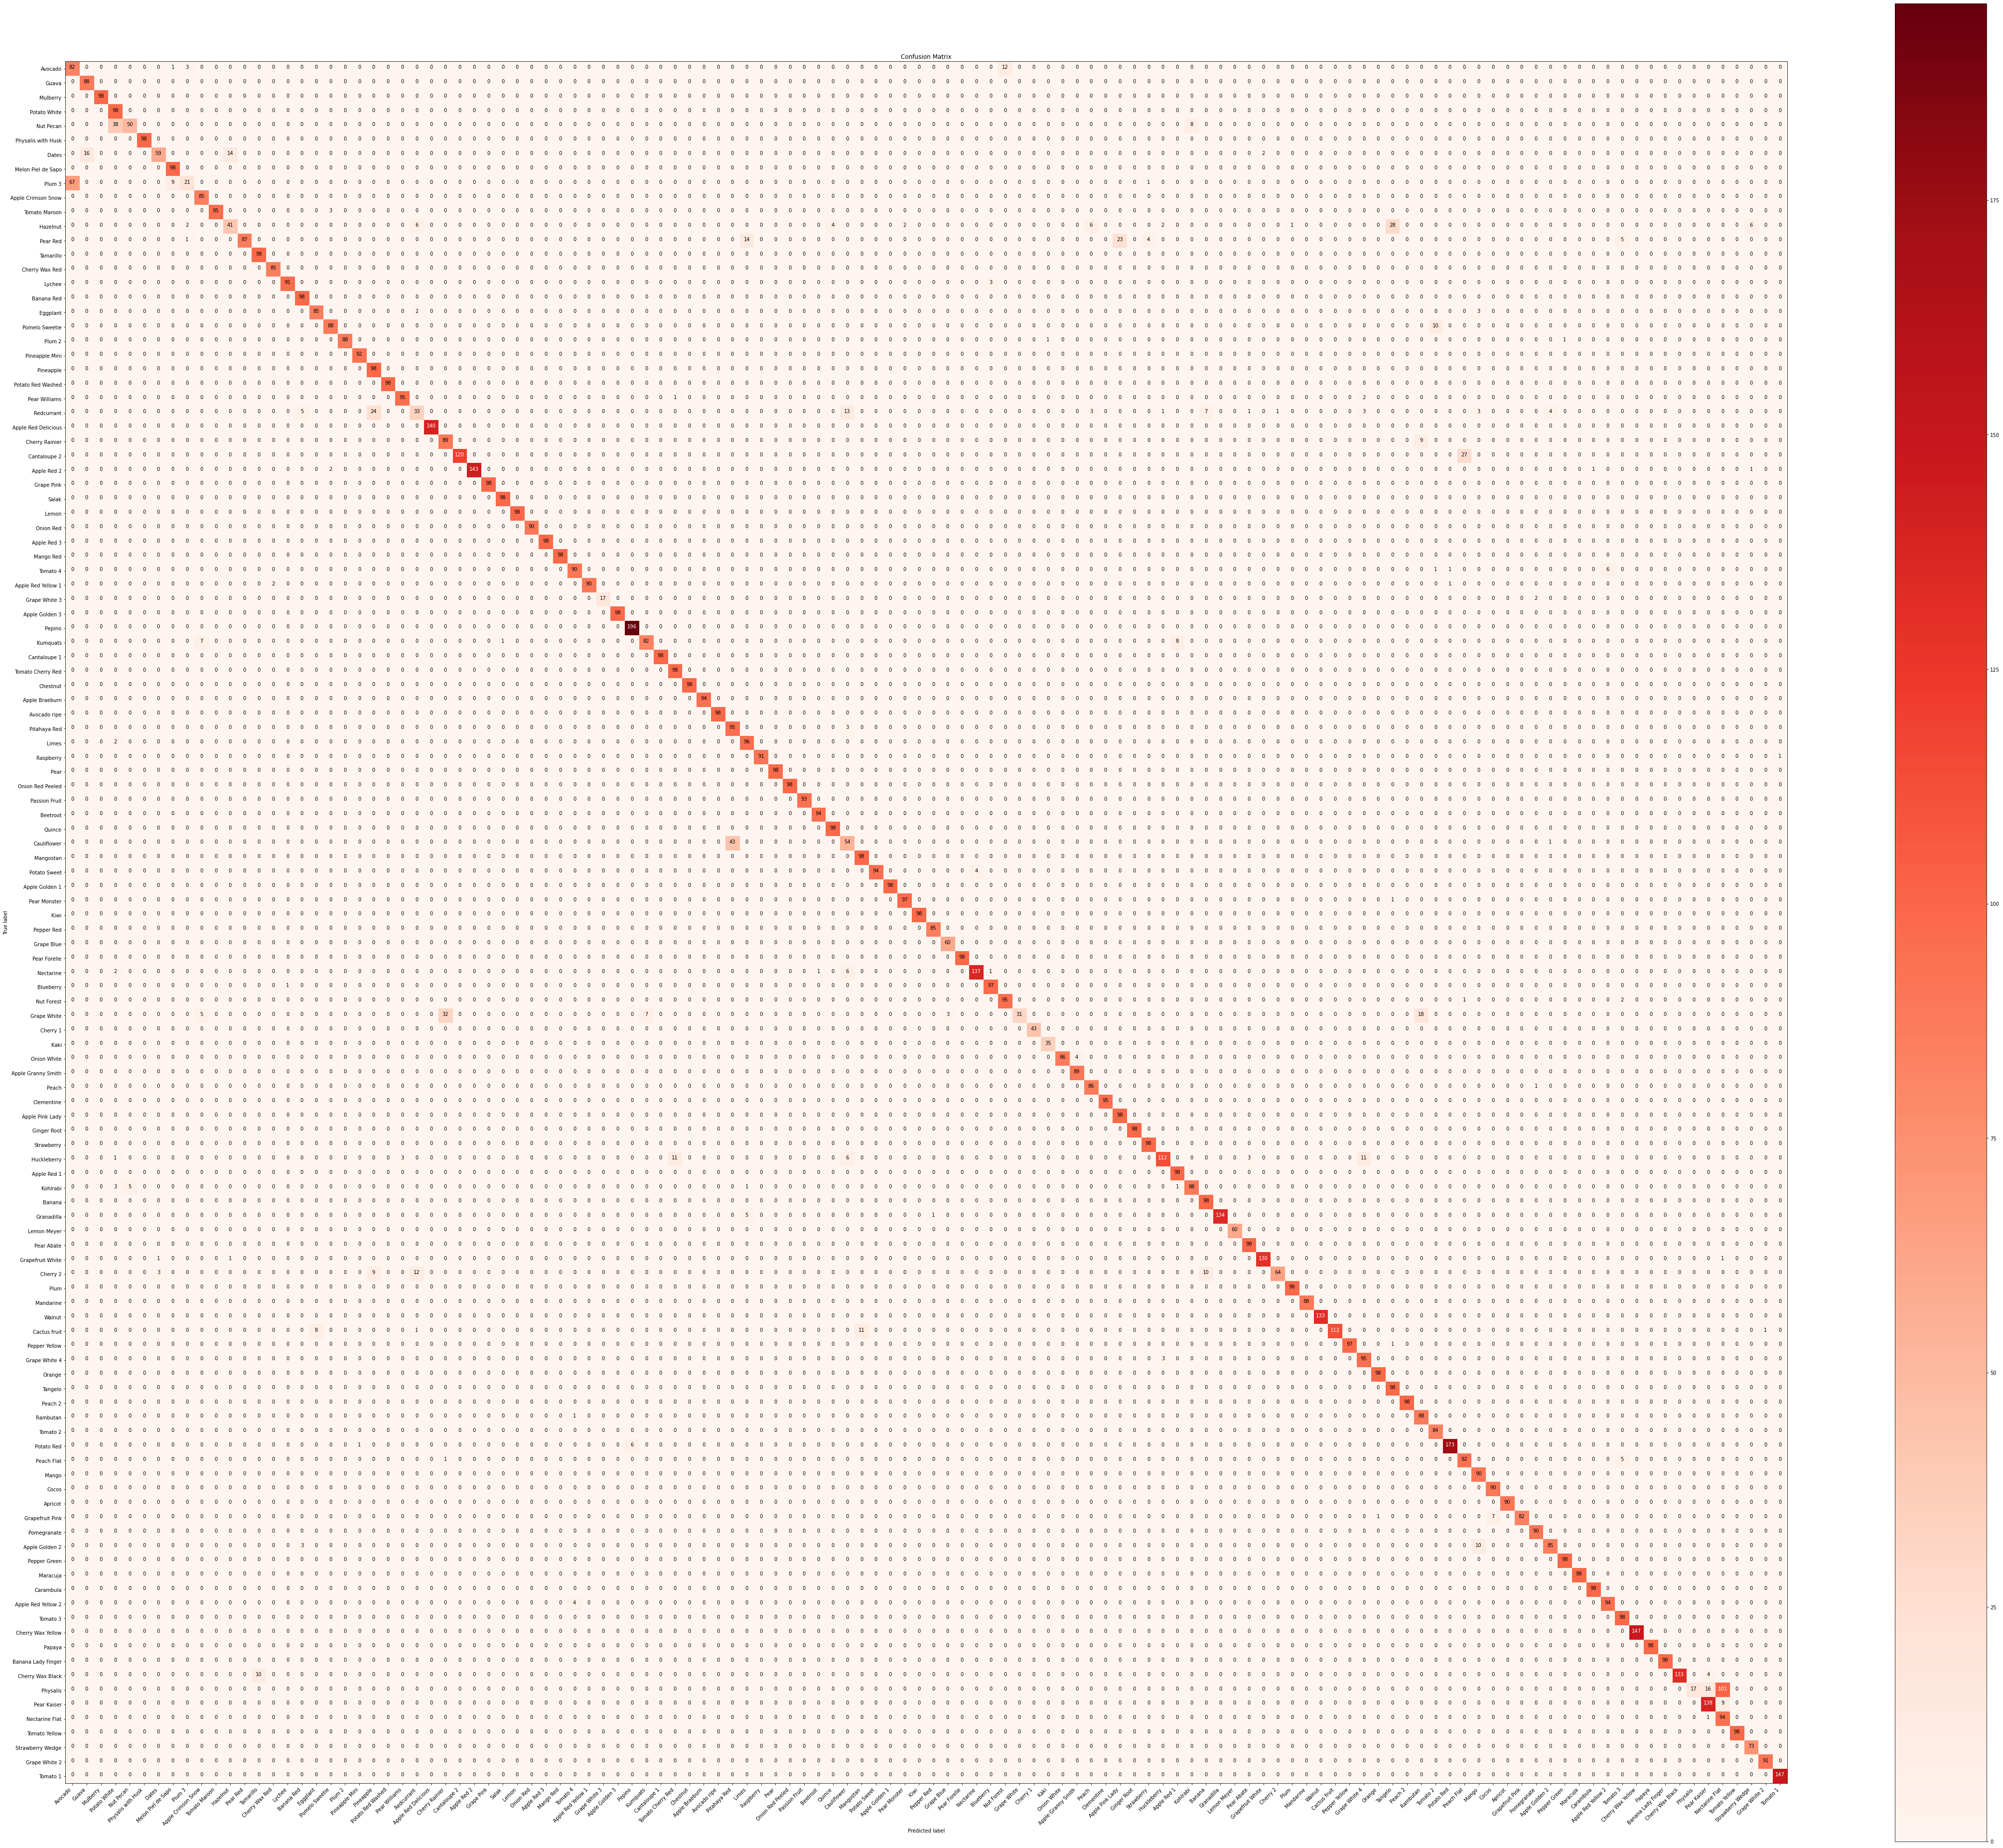

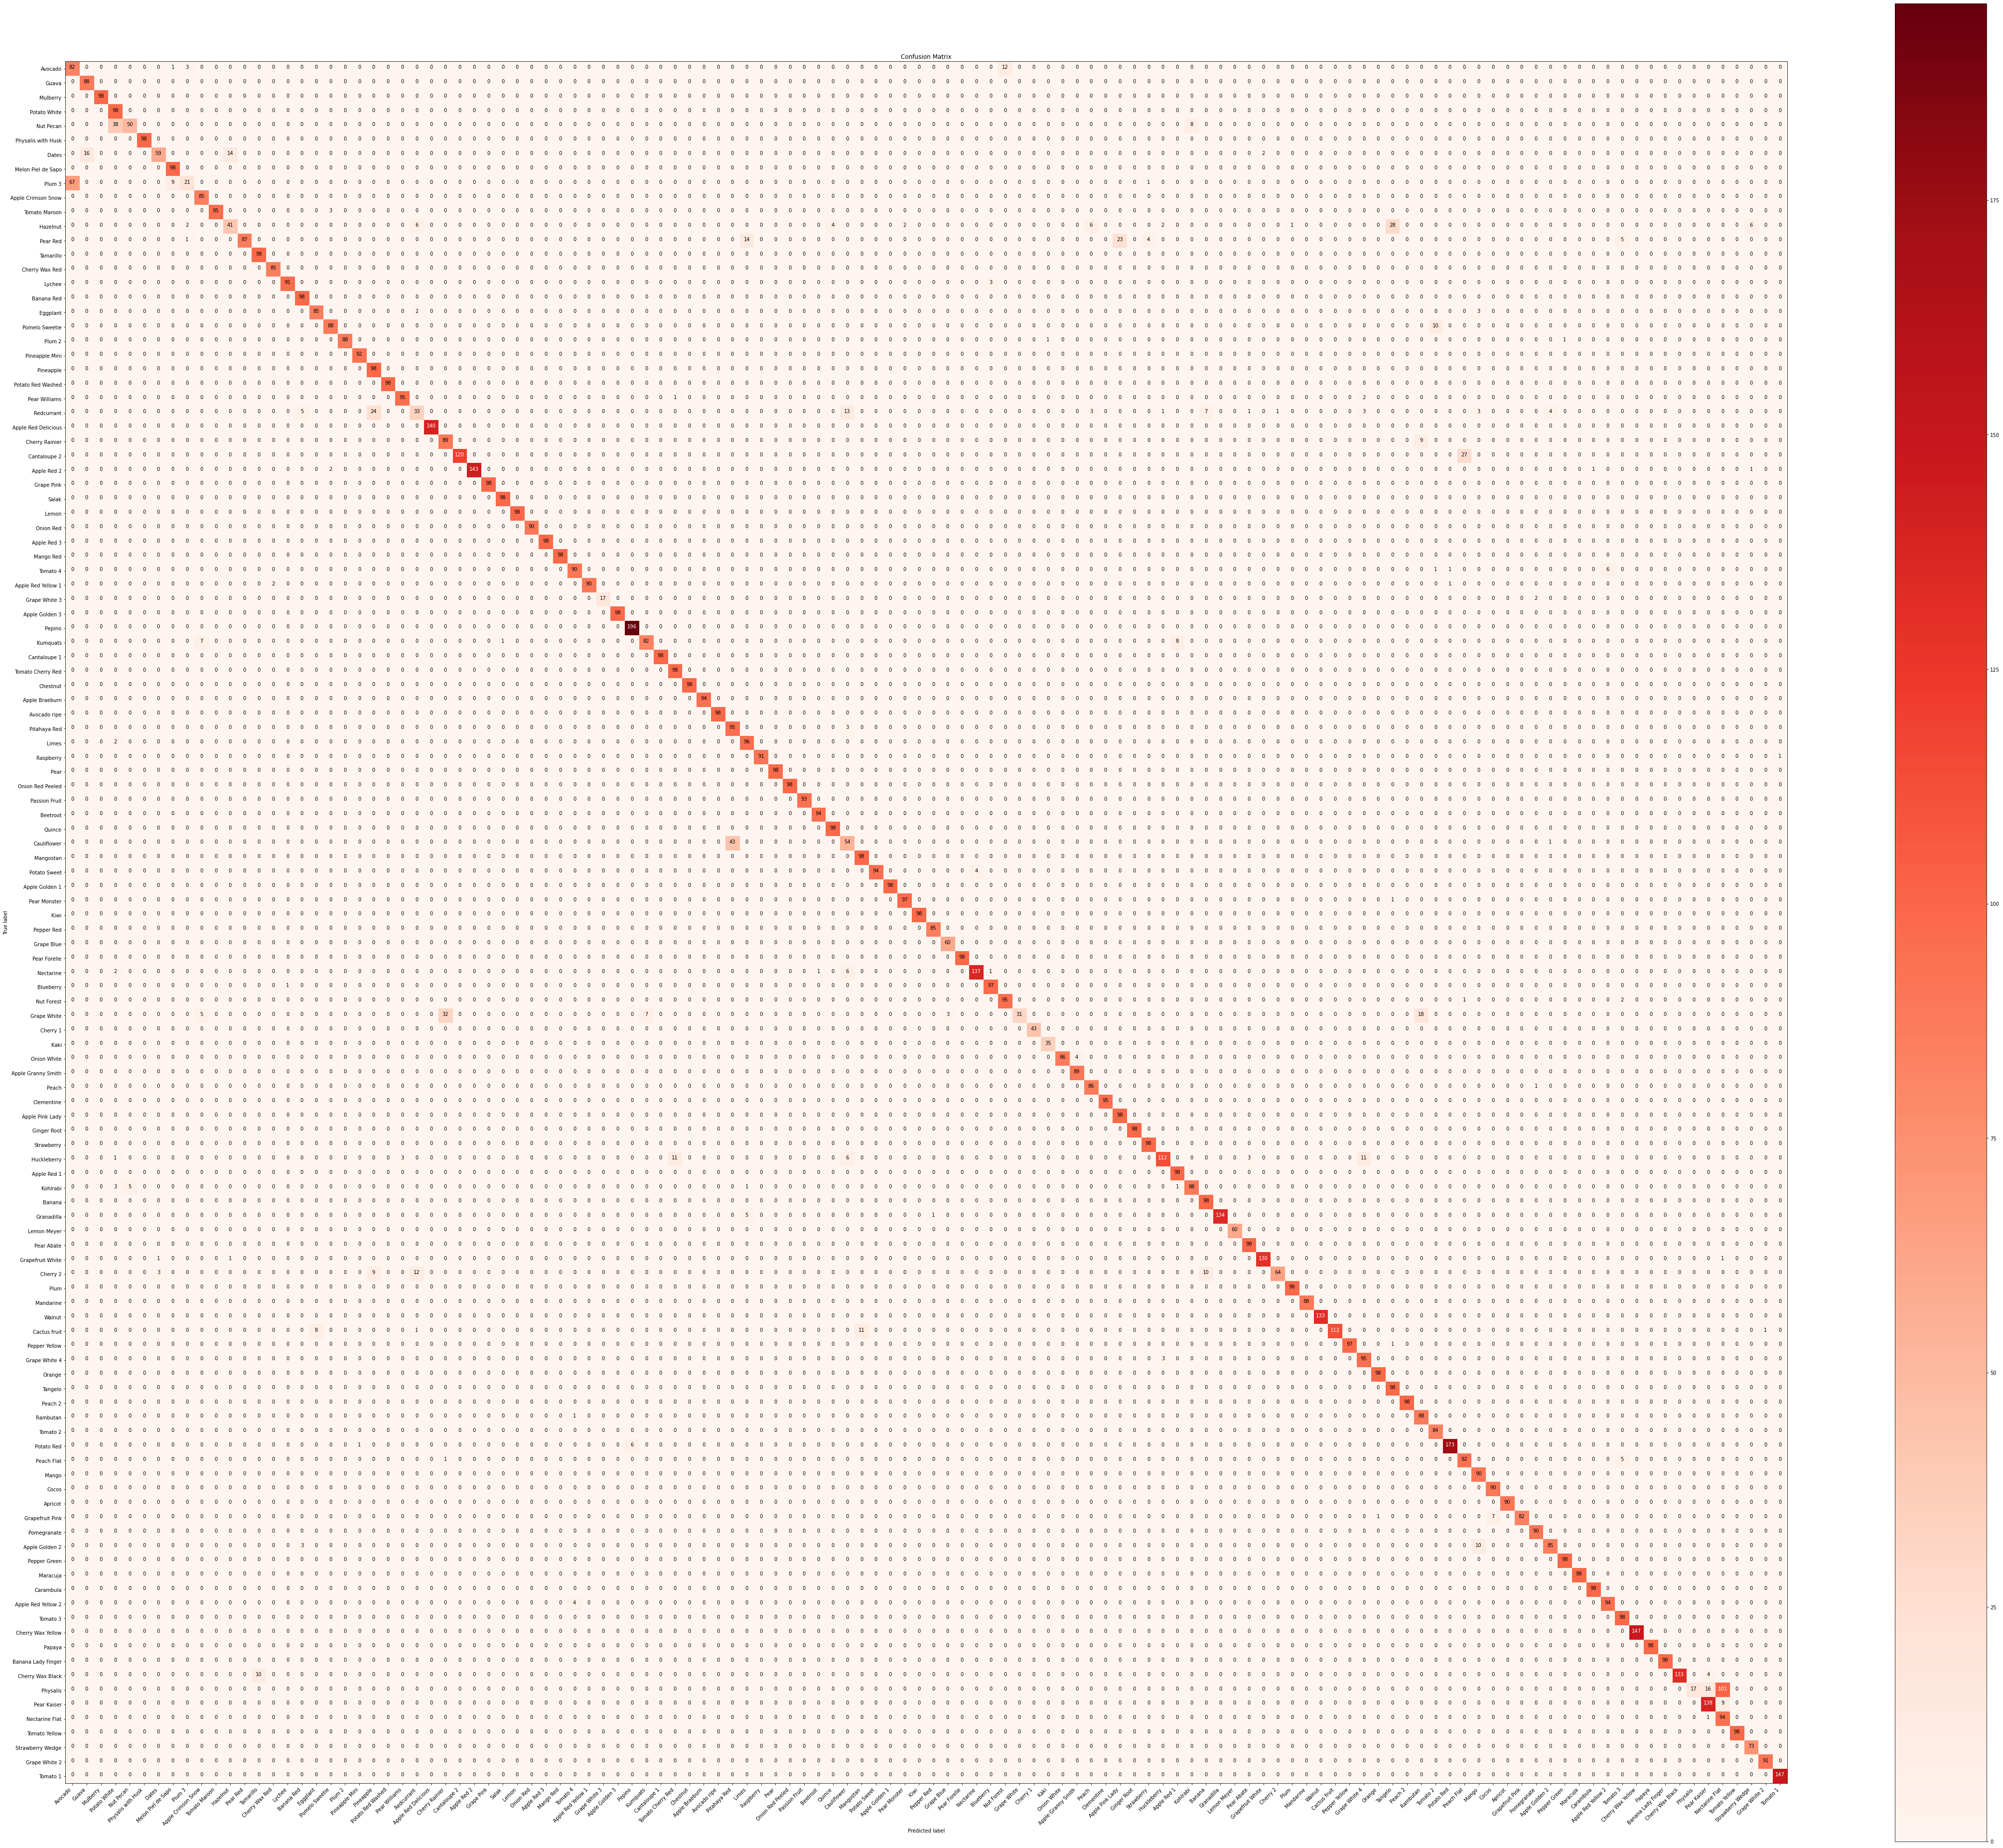

In [33]:
cm = utils.get_confusion_matrix(model, val_batches)
fig = utils.plot_cm(cm, class_names)
plt.savefig(save_path + '.confusion_matrix.pdf', format='pdf')
fig